# Die vergessenen Pandemien: Was die Schweiz aus ihrer Vergangenheit lernen kann
 
Pandemien wie COVID-19 haben uns gezeigt, wie verletzlich moderne Gesellschaften trotz technologischem Fortschritt sein können. Doch die Geschichte kennt viele solcher Gesundheitskrisen – auch in der Schweiz.  
 
Dieses Projekt visualisiert historische Daten zu Pandemien und Sterblichkeit in der Schweiz, um zu zeigen:
- wie Krankheiten sich über Kantone verbreiteten,
- wie Todesraten sich entwickelten,
- und was wir daraus für zukünftige Krisen lernen können.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, row
from bokeh.palettes import PuBu, BuPu
from bokeh.models import (
    ColumnDataSource, HoverTool, Span, Range1d, LinearAxis, Label, LabelSet,
    PanTool, BoxZoomTool, WheelZoomTool, ResetTool, CrosshairTool,
    NumeralTickFormatter, Legend, Title, Select, RadioButtonGroup
)
from bokeh.transform import dodge


In [2]:
data_set1 = pd.read_excel("../Data/1_History_Pandemics.xlsx")
data_set2_mortality = pd.read_excel("../Data/2_All_cantons_1953-1958_Mortality.xlsx")
data_set2_incidence_weekly = pd.read_excel("../Data/2_Data_cantons_incidence_weekly_56_58_NEW.xlsx")
data_set2_population = pd.read_excel("../Data/2_Population_cantons.xlsx")
data_set3 = pd.read_excel("../Data/3_Todesursachen Schweiz ohne Alter 1876-2002.xlsx", header=None)

# Data Profiling with ydata_profiling

In [3]:
# Data Profiling dataset 1
from ydata_profiling import ProfileReport
profile = ProfileReport(data_set1, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("Dataset1_profiling.html")  # Save the report to a file
# profile

In [4]:
# Data Profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(data_set2_mortality, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("data_set2_mortality_profiling.html")  # Save the report to a file
# profile

In [5]:
# Data Profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(data_set2_incidence_weekly, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("data_set2_incidence_weekly_profiling.html")  # Save the report to a file
# profile

In [6]:
# Data Profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(data_set2_population, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("data_set2_population.html")  # Save the report to a file
# profile

In [7]:
# Data Profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(data_set3, 
                        title="OUR DATASET", 
                        sort=None,
                        sensitive=False,
                        explorative=False)

# Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# profile.to_file("data_set3_population.html")  # Save the report to a file
# profile

---
# Look at the datasets

## Dataset 1

In [8]:
data_set1.describe()

,Jahr,Todesfälle_Grippe_100000,Todesfälle_Covid_100000,TodesfälleGrippe,TodesfälleCOVID,Population,Überasterblichkeit_Alles,ÜberasterblichkeitPlus,ÜberasterblichkeitMinus
count,143.00000,140.000000,3.000000,140.00000,3.000000,1.430000e+02,141.000000,77.000000,68.000000
mean,1951.00000,18.172899,74.326929,767.00000,6431.666667,5.195008e+06,0.656738,3.740260,-2.873529
std,41.42463,48.962370,31.572219,1883.48357,2685.667391,1.715657e+06,5.842117,6.033792,2.543568
min,1880.00000,0.038532,46.104776,3.00000,4029.000000,2.840501e+06,-13.800000,0.000000,-13.800000
25%,1915.50000,3.034354,57.278424,155.25000,4982.000000,3.855200e+06,-2.100000,0.700000,-4.025000
50%,1951.00000,7.818421,68.452072,422.00000,5935.000000,4.717200e+06,0.300000,2.500000,-2.300000
75%,1986.50000,19.202038,88.438006,839.25000,7633.000000,6.504124e+06,2.800000,4.900000,-0.975000
max,2022.00000,554.049400,108.423939,21491.00000,9331.000000,8.738791e+06,49.300000,49.300000,0.000000


In [9]:
data_set1.head(10)

,Jahr,Todesfälle_Grippe_100000,Todesfälle_Covid_100000,TodesfälleGrippe,TodesfälleCOVID,Population,Überasterblichkeit_Alles,ÜberasterblichkeitPlus,ÜberasterblichkeitMinus
0,1880,3.766941,NaN,107.0,NaN,2840501,NaN,0.0,0.0
1,1881,2.358739,NaN,67.0,NaN,2840501,NaN,0.0,0.0
2,1882,3.191577,NaN,91.0,NaN,2851255,1.0,1.0,NaN
3,1883,2.762012,NaN,79.0,NaN,2860234,-4.6,NaN,-4.6
4,1884,1.880705,NaN,54.0,NaN,2871264,-1.0,NaN,-1.0
5,1885,2.115360,NaN,61.0,NaN,2883670,7.2,7.2,NaN
6,1886,2.109133,NaN,61.0,NaN,2892184,3.2,3.2,NaN
7,1887,1.929966,NaN,56.0,NaN,2901605,-0.8,NaN,-0.8
8,1888,2.610578,NaN,76.0,NaN,2911233,-2.7,NaN,-2.7
9,1889,1.813270,NaN,53.0,NaN,2922897,2.4,2.4,NaN


## Dataset 3

In [10]:
data_set3

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,T 14.1.1.4,Todesursachen nach Organerkrankungen 1876-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jahr,Infektions- und parasitäre Krankheiten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Unbekannte Todesursachen,NaN,NaN,NaN,Gesamt-
4,NaN,"Pocken, Scharlach, Masern, Typhus, Diphtherie,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuberkulose,...,Schwanger-,Angeborene Säug-,NaN,Alters-,NaN,Arzt,Arzt,Total,NaN,total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,* Partielle Veränderung der Nomenklatur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,Quellen: Eidg. Statistisches Amt / Bundesamt f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_set3.head(10)

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,T 14.1.1.4,Todesursachen nach Organerkrankungen 1876-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jahr,Infektions- und parasitäre Krankheiten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Unbekannte Todesursachen,NaN,NaN,NaN,Gesamt-
4,NaN,"Pocken, Scharlach, Masern, Typhus, Diphtherie,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuberkulose,...,Schwanger-,Angeborene Säug-,NaN,Alters-,NaN,Arzt,Arzt,Total,NaN,total
5,NaN,Total,Pocken,Schar-,Masern,"Typhus,",Diph-,Keuch-,NaN,Total,...,schaft u.,lingskrankheiten,NaN,schwäche,NaN,beige-,nicht bei-,NaN,NaN,NaN
6,NaN,NaN,NaN,lach 1),2),Para-,therie,husten,NaN,NaN,...,Geburt,Total,Früh-,NaN,NaN,zogen,gezogen,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,typhus 3),NaN,NaN,NaN,NaN,...,NaN,NaN,geburt 14),NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1876,3844,8,715,93,1335,1197,496,NaN,...,...,...,...,...,...,NaN,1604,16096,17700,NaN,66819


In [4]:
header_rows = data_set3.iloc[3:6].fillna(method='ffill', axis=1)
combined_headers = header_rows.apply(lambda x: ' | '.join(x.dropna().astype(str)), axis=0)

# Effektive Daten ab Zeile 10 (Index 9)
data = data_set3.iloc[9:].copy()
data.columns = combined_headers
data = data.reset_index(drop=True)

for col in data.columns:
    print(col)

Jahr
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Total
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Pocken
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Schar-
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Masern
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Typhus,
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Diph-
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Keuch-
Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Keuch-
Infektions- und parasitäre Krankheiten | Tuberkulose | Total
Infektions- und parasitäre Krankheiten | Tuberkulose | Atmungso

/var/folders/p8/nqtkrmb97rl9j85dz7ymwtq80000gn/T/ipykernel_10789/933603028.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  header_rows = data_set3.iloc[3:6].fillna(method='ffill', axis=1)


In [13]:
data.to_csv("../Data/data_set3_cleaned.csv")

---
## Dataset 1. Pandemic Death Rates (Bar Chart)


In 2020, the COVID-19 pandemic disrupted life across the globe. In Switzerland, as in many countries, society paused, reeled, and eventually adapted. As the emergency fades, a question lingers:

> **Have we really learned from this crisis—or are we doomed to forget, again?**

This project invites you on a journey. A journey through 130 years of Swiss pandemic history, told through data: deaths, diseases, and resilience. We visualize key insights from historical records to better understand how pandemics shaped our past—and how they can guide our future.


### How Deadly Were Past Pandemics?
When people think of pandemics, COVID-19 is top of mind. But how does it compare to earlier pandemics?

To answer this, we looked at death rates from major pandemics in Switzerland from 1889 to 2020, measured per 100,000 people. The bar chart below reveals the toll of each crisis:



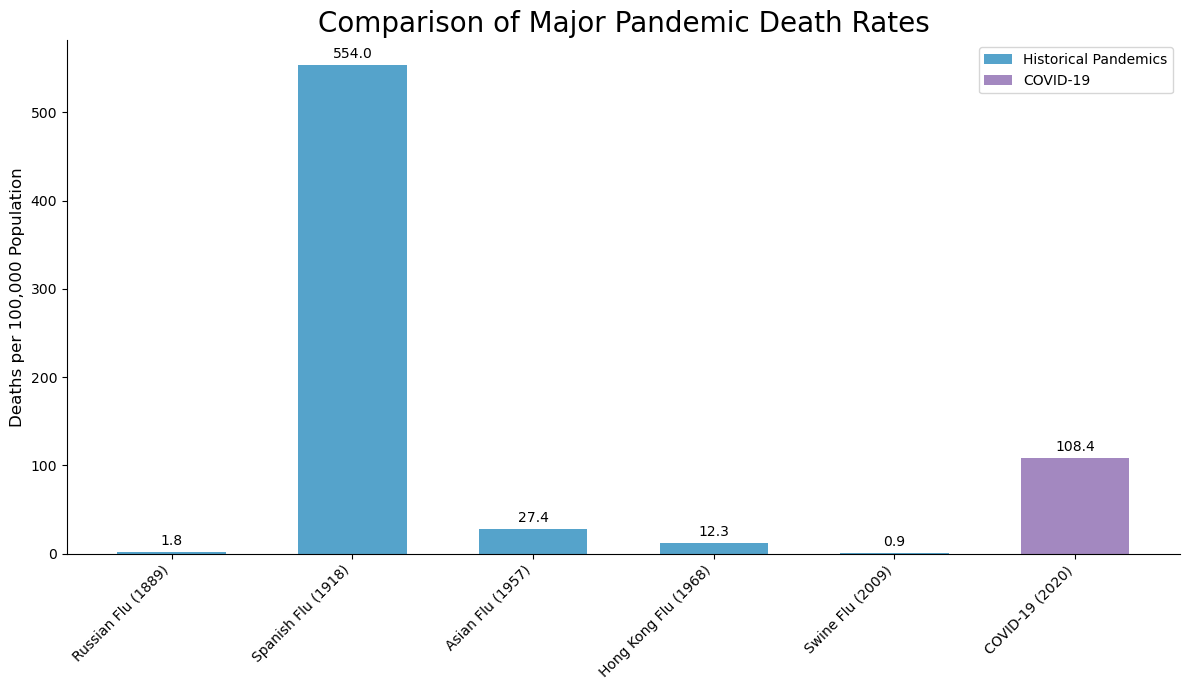

In [3]:
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]  # Major pandemic years
pandemic_data = data_set1[data_set1['Jahr'].isin(pandemic_years)].copy()

# Erstelle eine neue Spalte für die Todesfälle pro Pandemie
pandemic_data['Todesfälle_100000'] = pandemic_data['Todesfälle_Grippe_100000'].fillna(0)
# Ersetze COVID-Werte für 2020
pandemic_data.loc[pandemic_data['Jahr'] == 2020, 'Todesfälle_100000'] = pandemic_data.loc[pandemic_data['Jahr'] == 2020, 'Todesfälle_Covid_100000'].fillna(0)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Set width of bars
bar_width = 0.6
index = np.arange(len(pandemic_years))

# Erstelle eine Farbliste (alle blau außer COVID in orange)
colors = [PuBu[6][1], PuBu[6][1], PuBu[6][1], PuBu[6][1], PuBu[6][1], BuPu[7][2]]


# Create the bars (nur ein Balken pro Pandemie)
bars = ax.bar(index, pandemic_data['Todesfälle_100000'], 
              bar_width, color=colors, alpha=0.8)

# Add labels, title
ax.set_ylabel('Deaths per 100,000 Population', fontsize=12)
ax.set_title('Comparison of Major Pandemic Death Rates', fontsize=20)

# Add pandemic names with years directly in the x-tick labels
pandemic_names_with_years = ["Russian Flu (1889)", "Spanish Flu (1918)", "Asian Flu (1957)", 
                           "Hong Kong Flu (1968)", "Swine Flu (2009)", "COVID-19 (2020)"]
ax.set_xticks(index)
ax.set_xticklabels(pandemic_names_with_years, rotation=45, ha='right')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}', 
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points", 
                   ha='center', va='bottom')

# Füge eine Legende hinzu
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=PuBu[6][1], alpha =0.8, label='Historical Pandemics'),
    Patch(facecolor=BuPu[7][2], alpha = 0.8, label='COVID-19')
]
ax.legend(handles=legend_elements, loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

### Key Findings:

- The 1918 Spanish Flu had by far the highest death rate in Swiss history—more than five times higher than COVID-19.
- Pandemics in 1957 (Asian Flu) and 1968 (Hong Kong Flu) caused significant but lesser mortality.
- The 2009 Swine Flu was comparatively mild in Switzerland.

>COVID-19 was not the deadliest pandemic in Swiss history. In fact, the Spanish Flu of 1918 remains unmatched in scale. But history shows: even ‘moderate’ pandemics can leave lasting scars.


---
## Dataset 1: Population and Pandemic Deaths Over Time

### Time, Population, and Mortality: The Bigger Picture
Pandemic impact doesn’t occur in isolation—it happens in the context of a growing society. To understand the broader picture, we plotted pandemic death rates alongside population growth over more than a century.

**Tip:** Hover over the lines in the chart to explore each year. You’ll see how many people lived in Switzerland, and how many died from influenza or COVID-19 during that time.

In [4]:
output_notebook()


pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]
pandemic_names = ["Russian Flu", "Spanish Flu", "Asian Flu", "Hong Kong Flu", "Swine Flu"]

# Daten vorbereiten
pandemic_data = data_set1.copy()
highlight_data = data_set1[data_set1['Jahr'].isin(pandemic_years)].copy()


source_main = ColumnDataSource(pandemic_data)
source_highlights = ColumnDataSource(highlight_data)


p = figure(
    title="Pandemic Mortality vs. Population Growth (1889-2020)",
    height=600,
    width=950,
    x_axis_label="Year",
    y_axis_label="Population",
    tools=""  
)


p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.y_range = Range1d(0, pandemic_data['Population'].max() * 1.1)


max_deaths = max(pandemic_data['Todesfälle_Grippe_100000'].max(), 
               pandemic_data['Todesfälle_Covid_100000'].max())
p.extra_y_ranges = {"deaths": Range1d(0, max_deaths * 1.1)}
p.add_layout(LinearAxis(y_range_name="deaths", axis_label="Deaths per 100,000 Population"), 'right')


population_line = p.line(
    x='Jahr', y='Population', source=source_main,
    line_width=3, line_dash='dashed', color='black',
    alpha=0.5, legend_label="Population"
)


flu_line = p.line(
    x='Jahr', y='Todesfälle_Grippe_100000', source=source_main,
    y_range_name='deaths', line_width=3, color=PuBu[7][0],
    alpha=0.7, legend_label="Influenza Deaths"
)


for year in pandemic_years:
    if year in pandemic_data['Jahr'].values:
        vline = Span(location=year, dimension='height', 
                   line_color='grey', line_dash='dashed', line_width=1)
        p.add_layout(vline)


flu_circles = p.circle(
    x='Jahr', y='Todesfälle_Grippe_100000', source=source_highlights,
    y_range_name='deaths', size=10, color=PuBu[7][0],
    line_color=PuBu[7][0], line_width=1, alpha = 0.8
)


# Tooltip für Crosshair
hover = HoverTool(
    tooltips=[
        ("Year", "@Jahr"),
        ("Population", "@Population{0,0}"),
        ("Influenza Deaths", "@{Todesfälle_Grippe_100000}{0.0} per 100k")
    ],
    renderers=[population_line],
    mode='vline',  
    line_policy='nearest'
)

# Create a properly defined CrosshairTool
crosshair = CrosshairTool(line_color="gray", line_alpha=0.5)

# In 

tools = [
    PanTool(),
    BoxZoomTool(),
    WheelZoomTool(),
    ResetTool(),
    crosshair,
    hover,
]
p.add_tools(*tools)

# Legende und Styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.7

p.title.text_font_size = '14pt'
p.title.align = 'center'

p.grid.grid_line_alpha = 0.3

# Plot anzeigen
show(p)

Loading BokehJS ...

>“A growing population does not automatically mean higher mortality—if health systems adapt. Still, sharp spikes in 1918 and 2020 show that even modern nations remain vulnerable when overwhelmed.”

### Key Findings:
- Switzerland's population grew from under 3 million in 1880 to over 8 million by 2022.
- Despite this growth, pandemic death rates spiked dramatically only in select years—especially in 1918 and 2020.
- Medical and public health advances appear to have helped reduce death rates in later pandemics.

Of particular interest to most: COVID-19. 

It is precisely from this current data that we can probably draw the most important insights. That is why it is also presented here individually and in more detail. The chart shows how many deaths from COVID-19 there have been in Switzerland each year.

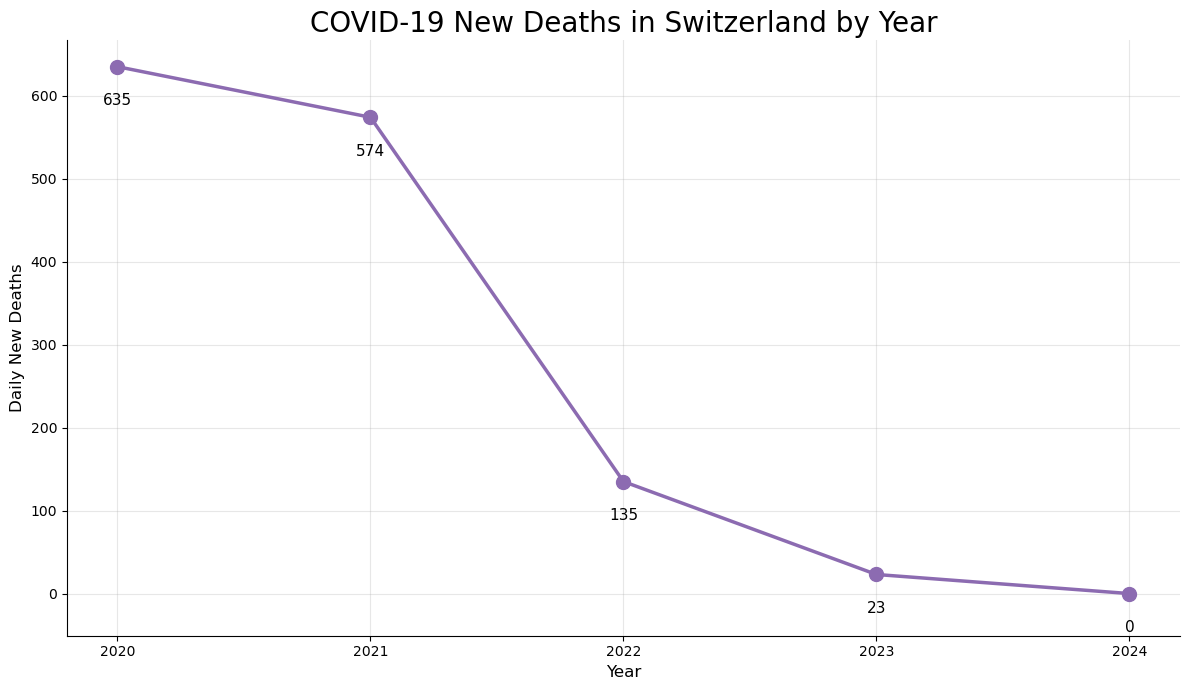

In [6]:
data_covid = pd.read_csv("../Data/full_data.csv")

# Filter for Switzerland
switzerland_data = data_covid[data_covid['location'] == 'Switzerland'].copy()
switzerland_data['date'] = pd.to_datetime(switzerland_data['date'])
switzerland_data['year'] = switzerland_data['date'].dt.year

# Get end-of-year totals for new_deaths instead of total_cases
yearly_data = switzerland_data.groupby('year').agg({'new_deaths': 'max'}).reset_index()

# --- Plot Design-Stil anpassen ---
fig, ax = plt.subplots(figsize=(12, 7))

# Linie mit Marker
ax.plot(yearly_data['year'], yearly_data['new_deaths'],
        marker='o', markersize=10, linewidth=2.5,
        color=BuPu[7][2])  

# Werte beschriften UNTER den Punkten
for x, y in zip(yearly_data['year'], yearly_data['new_deaths']):
    # Format the number with comma separators
    ax.text(x, y - (yearly_data['new_deaths'].max() * 0.05),
            f'{int(y):,}', ha='center', va='top', fontsize=11)

ax.set_title('COVID-19 New Deaths in Switzerland by Year', fontsize=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Daily New Deaths', fontsize=12)

# Format x-axis to use integers only (no decimal places)
ax.xaxis.set_major_locator(plt.matplotlib.ticker.MaxNLocator(integer=True))

ax.grid(True, alpha=0.3)
ax.set_ylim(bottom=-yearly_data['new_deaths'].max() * 0.08,
            top=yearly_data['new_deaths'].max() * 1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Layout justieren
plt.tight_layout()
plt.show()

---
## Dataset 1: Excess Mortality Over Time



### Excess Mortality Over Time
To understand the true cost of pandemics, we looked beyond reported causes of death. Sometimes, people die because of a pandemic, but not from the disease itself—indirect effects like delayed treatments, overwhelmed hospitals, or social disruptions can all lead to excess deaths.

This is where excess mortality becomes essential. It measures how many people died above or below what we would statistically expect in a normal year, based on historical trends.

**How to read the graph:**

- Each dot represents a year between 1880 and 2022.
- Red dots mean more people died than expected → positive excess mortality.

    This often occurs during severe flu seasons, pandemics, heatwaves, or crises.

- Green dots mean fewer people died than expected → negative excess mortality.

    This can reflect milder flu seasons, improved healthcare, or social measures like lockdowns reducing accidents.
    
- The gray line shows the trend over time.
- Vertical lines mark known pandemic years like 1918, 1957, and 2020.
- The horizontal dashed line at 0% represents the baseline: deaths were as expected that year.

In [7]:
output_notebook()

# Prepare the data
df = data_set1.copy()

# Drop rows where either 'Jahr' or 'Überasterblichkeit_Alles' is missing
df = df.dropna(subset=['Jahr', 'Überasterblichkeit_Alles'])

# Data subsets for coloring
df_pos = df[df['Überasterblichkeit_Alles'] > 0]
df_neg = df[df['Überasterblichkeit_Alles'] <= 0]

source_pos = ColumnDataSource(df_pos)
source_neg = ColumnDataSource(df_neg)


# Create the figure
p = figure(
    title="Excess Mortality in Switzerland (1880–2022)",
    height=600,
    width=950,
    x_axis_label="Year",
    y_axis_label="Excess Mortality (%)",
    tools="pan,box_zoom,reset,wheel_zoom,hover",
    tooltips=[
        ("Year", "@Jahr"),
        ("Excess Mortality", "@Überasterblichkeit_Alles{0.0}%")
    ]
)

# Line showing the trend
p.line('Jahr', 'Überasterblichkeit_Alles', source=df, line_width=3, color= PuBu[7][0], alpha= 0.7)

# Colored points
p.scatter(
    'Jahr', 'Überasterblichkeit_Alles', source=df,
    size=8, color='color', line_color='black', line_width=1
)

# Horizontal line at 0%
zero_line = Span(location=0, dimension='width', line_color='black', line_dash='dashed', line_width=2, line_alpha= 0.7 )
p.add_layout(zero_line)

# Mark pandemic years
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]
for year in pandemic_years:
    if year in df['Jahr'].values:
        vline = Span(location=year, dimension='height', line_color='grey', line_dash='dotted', line_width=1)
        p.add_layout(vline)

# Styling
p.title.text_font_size = '14pt'
p.title.align = 'center'
p.y_range = Range1d(-15, 50)

p.grid.grid_line_alpha = 0.3


p.scatter(
    x='Jahr', y='Überasterblichkeit_Alles', source=source_pos,
    size=8, color=BuPu[7][2], line_color=BuPu[7][2], line_width=1, alpha = 0.8,  legend_label='Excess Mortality > 0'
)

p.scatter(
    x='Jahr', y='Überasterblichkeit_Alles', source=source_neg,
    size=8, color=PuBu[6][1], line_color=PuBu[6][1], line_width=1, alpha = 0.8, legend_label='Excess Mortality ≤ 0'
)

# Legend styling
p.legend.location = "top_right"
p.legend.title = "Legend"
p.legend.label_text_font_size = '10pt'
p.legend.title_text_font_style = 'bold'
p.legend.background_fill_alpha = 0.6



# Show the plot
show(p)


Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='color' [no close matches], hatch_color='color' [no close matches] {renderer: GlyphRenderer(id='p1166', ...)}


## Dataset 2 approx 7

In [8]:
# --- Imports ---
import pandas as pd
import geopandas as gpd

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import (
    GeoJSONDataSource, HoverTool, ColorBar, LinearColorMapper, Slider
)
from bokeh.layouts import column
from bokeh.palettes import Viridis256
from bokeh.palettes import Category20b

palette = Category20b[20]  # Use up to 20 pastel-like colors

output_notebook()

# --- Load and clean population data ---
population_path = '../Data/2_Population_cantons.xlsx'
pop_data = pd.read_excel(population_path)
pop_data = pop_data.drop(columns='CH')

# Reshape to long format
df_pop_long = pop_data.melt(id_vars="Year", var_name="Canton", value_name="Population")
df_pop_long["Population"] /= 1_000_000  # Convert to millions

# Canton abbreviation to full name
canton_name_map = {
    "ZH": "Zürich", "BE": "Bern", "LU": "Luzern", "UR": "Uri", 
    "SZ": "Schwyz", "OW": "Obwalden", "NW": "Nidwalden", "GL": "Glarus",
    "ZG": "Zug", "FR": "Fribourg", "SO": "Solothurn", "BS": "Basel-Stadt", 
    "BL": "Basel-Landschaft", "SH": "Schaffhausen", "AR": "Appenzell Ausserrhoden",
    "AI": "Appenzell Innerrhoden", "SG": "St. Gallen", "GR": "Graubünden", 
    "AG": "Aargau", "TG": "Thurgau", "TI": "Ticino", "VD": "Vaud", 
    "VS": "Valais", "NE": "Neuchâtel", "GE": "Genève", "JU": "Jura"
}
df_pop_long["Canton"] = df_pop_long["Canton"].map(canton_name_map)

# --- Load and prepare shapefile ---
shapefile_path = '../data/swissBOUNDARIES3D_1_4_TLM_KANTONSGEBIET.shp'
cantons = gpd.read_file(shapefile_path)
cantons = cantons.to_crs("EPSG:4326")  # Convert to lat/lon
cantons["Canton"] = cantons["NAME"]

# Merge geometry with population data
merged = cantons.merge(df_pop_long, on="Canton", how="left")

# Filter for specific years
years = list(range(1953, 1959))
merged = merged[merged["Year"].isin(years)]

# 🔧 FIX: Convert Year to int so it's JSON serializable
merged["Year"] = merged["Year"].astype(int)
merged = merged.drop(columns=["DATUM_AEND", "DATUM_ERST"])

# --- Initial map setup ---
initial_year = 1953
merged_initial = merged[merged["Year"] == initial_year]

# GeoJSON data source
geo_source = GeoJSONDataSource(geojson=merged_initial.to_json())

# Color mapper (you can also switch to Category20b or your own pastel palette)
color_mapper = LinearColorMapper(palette=Viridis256,
                                 low=merged["Population"].min(),
                                 high=merged["Population"].max())

# Bokeh figure
p = figure(title=f"Swiss Canton Population in {initial_year}",
           tools="pan,wheel_zoom,reset,hover",
           x_axis_location=None, y_axis_location=None,
           width=850, height=650)
p.grid.grid_line_color = None

# Draw canton shapes
p.patches('xs', 'ys', source=geo_source,
          fill_color={'field': 'Population', 'transform': color_mapper},
          fill_alpha=0.8, line_color='white', line_width=0.5)

# Hover tool
hover = p.select_one(HoverTool)
hover.tooltips = [("Kanton", "@Canton"), ("Einwohner (Mio.)", "@Population{0.00}")]

# Color bar
color_bar = ColorBar(color_mapper=color_mapper,
                     label_standoff=12, location=(0,0),
                     title="Population (Mio.)")
p.add_layout(color_bar, 'right')

# --- Year slider ---
slider = Slider(start=1953, end=1958, value=initial_year, step=1, title="Year")

# Update function
def update_map(attr, old, new):
    year = slider.value
    new_data = merged[merged["Year"] == year]
    geo_source.geojson = new_data.to_json()
    p.title.text = f"Swiss Canton Population in {year}"

slider.on_change('value', update_map)

# --- Display layout ---
layout = column(p, slider)
show(layout)

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
import panel as pn
# Bokeh in Notebook aktivieren
output_notebook()

# Daten einlesen
incidence_df = pd.read_excel("../Data/2_Data_cantons_incidence_weekly_56_58_NEW.xlsx")

incidence_monthly = incidence_df.copy()

# Drop unnecessary columns
incidence_monthly = incidence_monthly.drop(columns='Parameter')

# Create YearMonth and group
incidence_monthly['YearMonth'] = incidence_monthly['StartReportingPeriod'].dt.to_period('M')
incidence_monthly = incidence_monthly.drop(columns=['StartReportingPeriod', 'EndReportingPeriod', 'Month'])
incidence_monthly = incidence_monthly.groupby('YearMonth').sum().reset_index()

# Convert YearMonth to a real datetime (first of each month)
incidence_monthly['Date'] = incidence_monthly['YearMonth'].dt.to_timestamp()

# Create source
source_incidence_monthly = ColumnDataSource(incidence_monthly)

# Plot
p = figure(title="Monthly Influenza Cases (1953–1958)",
           x_axis_type="datetime",
           width=950, height=550,
           x_axis_label="Date", y_axis_label="Number of Influenza cases",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Line chart
p.line(x='Date', y='CH', source=source_incidence_monthly,  # <-- 'CH' column for total cases
       line_width=3, color=Category10[3][2], legend_label="Influenza cases")

# Hover-Tool
hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Date", "@Date{%Y-%m}"),
    ("Influenza Cases", "@CH")
]
hover.formatters = {
    '@Date': 'datetime'
}
hover.mode = 'vline'

# Legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Plot anzeigen
show(p)
# Dropdown-Widget
canton_select = pn.widgets.Select(name='Select Canton', options=cantons, value=cantons[0])


Loading BokehJS ...

NameError: name 'Category10' is not defined

In [ ]:


# Bokeh im Notebook aktivieren
output_notebook()

# Daten einlesen
incidence_df = pd.read_excel("../Data/2_Data_cantons_incidence_weekly_56_58_NEW.xlsx")

# Daten vorbereiten
incidence_weekly = incidence_df.copy()

# Woche erstellen und unnötige Spalten löschen
incidence_weekly['weekly'] = incidence_weekly['StartReportingPeriod'].dt.to_period('W')
incidence_weekly = incidence_weekly.drop(columns=['StartReportingPeriod', 'EndReportingPeriod', 'Month'])

# Nach Woche gruppieren und Summieren
incidence_weekly = incidence_weekly.groupby('weekly').sum().reset_index()

# Wochenstartdatum extrahieren
incidence_weekly['Date'] = incidence_weekly['weekly'].dt.start_time

# Datenquelle für Bokeh
source = ColumnDataSource(incidence_weekly)

# Plot erstellen
p = figure(
    title="Weekly Influenza Cases (1952–1958)",
    x_axis_type="datetime",
    width=950,
    height=550,
    x_axis_label="Date",
    y_axis_label="Number of Influenza Cases",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save"
)

# Linie zeichnen
p.line(
    x='Date', 
    y='CH',  # Spalte für gesamte Schweiz
    source=source,
    line_width=3,
    color=Category10[3][2],
    legend_label="Switzerland (CH)"
)

# Hover-Tool anpassen
hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Date", "@Date{%F}"),
    ("Cases", "@CH")
]
hover.formatters = {'@Date': 'datetime'}
hover.mode = 'vline'

# Legende anpassen
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Plot anzeigen
show(p)

## The Invisible Peaks: Influenza Mortality in the Shadow of Total Deaths (1953–1958)
While influenza rarely dominates the headlines of mortality statistics, its seasonal impact is undeniable when viewed alongside the total number of deaths. Between 1953 and 1958 in Switzerland, influenza outbreaks show up as sharp, low peaks — especially in early 1953, 1956, and most notably in late 1957.

These spikes correspond to known influenza epidemics — most dramatically the Asian Flu (H2N2), which began spreading globally in mid-1957 and reached Europe by the end of that year. In Switzerland, this wave caused a visible rise in influenza-specific deaths, peaking in December 1957–January 1958 [source: World Health Organization].

Despite this, influenza-related mortality appears modest compared to the total number of deaths per month — which remain relatively stable and are shaped by broader trends such as aging populations, chronic disease, and seasonal factors like cold winters increasing respiratory-related mortality in general.

Still, influenza’s seasonal visibility in this dataset reminds us of a critical lesson: even when not catastrophic, flu seasons burden the healthcare system and add to existing mortality pressures. The hidden weight of influenza may not always be dramatic in scale, but its recurring role is both epidemiologically and socially significant.

- Flu peaks are visible in winters of 1953, 1956, and especially late 1957.

- The 1957/58 spike aligns with the global H2N2 pandemic (Asian Flu).

- Total deaths remain stable but include many causes — including chronic conditions and general respiratory illnesses.

- Contextual awareness (e.g., population aging or cold spells) is essential to interpret mortality patterns meaningfully.


In [ ]:
# # Comparison of influenza deaths and general deaths (per canton and Switzerland) (bis August 1958, da Daten fehlen)
output_notebook()

mortality_df = pd.read_excel("../Data/2_All_cantons_1953-1958_Mortality.xlsx")

# Parameter-Spalte normalisieren
mortality_df["Parameter"] = mortality_df["Parameter"].str.strip().str.lower()
mortality_df["Parameter"] = mortality_df["Parameter"].replace({
    "deaths total": "deaths total",
    "total deaths": "deaths total",
    "total death": "deaths total"
})

# Monatsnamen in Zahlen umwandeln
month_map = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}
mortality_df["Month"] = mortality_df["Month"].str.strip().str.lower().map(month_map)

# Influenza- und Total-Deaths für CH extrahieren
influenza_ch = mortality_df[mortality_df["Parameter"] == "deaths influenza"][["Year", "Month", "CH"]]
total_ch = mortality_df[mortality_df["Parameter"] == "deaths total"][["Year", "Month", "CH"]]

# Jahres- und Monatsweise Zusammenführen
comparison_df = influenza_ch.copy()
comparison_df = comparison_df.rename(columns={"CH": "Influenza_Deaths"})
comparison_df["Total_Deaths"] = total_ch["CH"].values

# Datum zusammenbauen
comparison_df["Date"] = pd.to_datetime(dict(year=comparison_df["Year"], month=comparison_df["Month"], day=1))

# Nur bis August 1958 behalten
comparison_df = comparison_df[(comparison_df["Year"] < 1958) | ((comparison_df["Year"] == 1958) & (comparison_df["Month"] <= 8))]


source = ColumnDataSource(comparison_df)

colors = Category10[3]

# Plot erstellen
p = figure(title="Comparison: Influenza Deaths vs. Total Deaths in Switzerland (1953–1958)",
           x_axis_type="datetime",
           width=950, height=550,
           x_axis_label="Date", y_axis_label="Anzahl Todesfälle",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Linie für Influenza-Todesfälle
p.line(x='Date', y='Influenza_Deaths', source=source,
       line_width=3, color=colors[0], legend_label="Influenza Deaths")

# Linie für Gesamttodesfälle
p.line(x='Date', y='Total_Deaths', source=source,
       line_width=3, color=colors[1], legend_label="Total Deaths")

# Hover-Tool 
hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Datum", "@Date{%Y-%m}"),
    ("Influenza-Todesfälle", "@Influenza_Deaths{0,0}"),
    ("Gesamte Todesfälle", "@Total_Deaths{0,0}")
]
hover.formatters = {'@Date': 'datetime'}
hover.mode = 'vline'

# Interaktive Legende
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Plot anzeigen
show(p)


Hinweis: Für die Monate September bis Dezember 1958 liegen keine vollständigen Total-Todesfalldaten vor. Die Analysen basieren daher auf den vollständig dokumentierten Jahren 1953 bis August 1958.

In [ ]:
print(comparison_df)

(Plot nochmals prüfen, stimmen die daten so wirklich?? und sources)
### The 1957 Flu Pandemic in Switzerland: Many Infections, Relatively Few Deaths
Between September and December 1957, Switzerland reported over 30,000 influenza cases per week (as of 13 October 1957). Yet monthly deaths peaked at around 300 (with a maximum of 494) — a significant number, but relatively small compared to the sheer volume of infections.

Why did so many get sick, but comparatively few died?

- High transmissibility, low fatality: The 1957 H2N2 flu virus was highly contagious but had a case fatality rate of around 0.1–0.3%. That means: for every 1,000 people infected, only 1–3 died on average.

- Younger populations were less affected: The virus disproportionately affected the elderly. In Switzerland at the time, the general population was younger — which may have reduced overall mortality.

- Better medical care & antibiotics: Antibiotics were increasingly available to treat secondary bacterial infections, like pneumonia, which often kill flu patients. Hospitals were better prepared compared to 1918.

- Vaccination campaigns had already started: In some countries, early vaccination efforts helped mitigate mortality — even if they didn’t prevent all infections.

**Sources: Understanding the 1957 Influenza Pandemic**

**1. CDC – Pandemic Influenza Past**
Overview of past influenza pandemics, including 1957.
➤ https://www.cdc.gov/bird-flu/avian-timeline/1880-1959.html , https://www.cdc.gov/pandemic-flu/index.html , https://archive.cdc.gov/www_cdc_gov/flu/pandemic-resources/1957-1958-pandemic.html 

**2. World Health Organization – A Global History of Influenza**
A peer-reviewed summary of historical influenza pandemics, including 1957–58 (H2N2), written by influenza expert E.D. Kilbourne.
➤ WHO – 1957–1958 Influenza Pandemic https://iris.who.int/bitstream/handle/10665/265339/PMC2537752.pdf?sequence=1 

**3. Younger Populations Were Less Affected**
➤ National Center for Biotechnology Information (NCBI): The Story of Influenza https://www.ncbi.nlm.nih.gov/books/NBK22148/ 

**4. Better Medical Care & Antibiotics**
➤ Centers for Disease Control and Prevention (CDC): Bacterial Pneumonia and Pandemic Influenza Planning https://wwwnc.cdc.gov/eid/article/14/8/07-0751_article 
➤ National Center for Biotechnology Information (NCBI):https://pmc.ncbi.nlm.nih.gov/articles/PMC2599911/ 

**5. Vaccination Campaigns Had Already Started**
➤ CDC Museum: Influenza Vaccine Roll Out https://cdcmuseum.org/exhibits/show/influenza/1957-pandemic/vaccine-rollout 

➤ World Health Organization (WHO): History of Influenza Vaccination
https://www.who.int/news-room/spotlight/history-of-vaccination/history-of-influenza-vaccination 




In [ ]:
# Visualise 1957 and 1958 (weekly cases and monthly deaths)

output_notebook()

# Load both datasets
cases_df = pd.read_excel("../Data/2_Data_cantons_incidence_weekly_56_58_NEW.xlsx")
deaths_df = pd.read_excel("../Data/2_All_cantons_1953-1958_Mortality.xlsx")

# Clean and prepare weekly case data
cases_df = cases_df[cases_df["Parameter"] == "Cases Influenza"]
weekly_ch = cases_df[["StartReportingPeriod", "CH"]].rename(columns={"StartReportingPeriod": "Date", "CH": "Weekly_Cases"})
weekly_ch["Date"] = pd.to_datetime(weekly_ch["Date"])

# Clean and prepare monthly death data
deaths_df["Parameter"] = deaths_df["Parameter"].str.strip().str.lower()
deaths_df = deaths_df[deaths_df["Parameter"] == "deaths influenza"]

month_map = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}
deaths_df["Month"] = deaths_df["Month"].str.lower().map(month_map)
deaths_df["Date"] = pd.to_datetime(dict(year=deaths_df["Year"], month=deaths_df["Month"], day=1))
monthly_ch = deaths_df[["Date", "CH"]].rename(columns={"CH": "Monthly_Deaths"})

# Filter for 1957 and 1958 only
weekly_ch = weekly_ch[(weekly_ch["Date"].dt.year >= 1957) & (weekly_ch["Date"].dt.year <= 1958)]
monthly_ch = monthly_ch[(monthly_ch["Date"].dt.year >= 1957) & (monthly_ch["Date"].dt.year <= 1958)]

# Plot
p = figure(title="Weekly Influenza Cases and Monthly Deaths (1957–1958)",
           x_axis_type="datetime",
           width=950, height=550,
           x_axis_label="Date", y_axis_label="Count",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

p.line(x='Date', y='Weekly_Cases', source=ColumnDataSource(weekly_ch),
       line_width=3, color=PuBu[7][0], alpha =0.7, legend_label="Weekly Cases")

p.circle(x='Date', y='Monthly_Deaths', source=ColumnDataSource(monthly_ch),
         size=8, color= BuPu[7][2], alpha= 0.8, legend_label="Monthly Influenza Deaths")

hover = p.select_one(HoverTool)
hover.tooltips = [("Date", "@Date{%F}"), ("Count", "$y{0,0}")]
hover.formatters = {'@Date': 'datetime'}

p.legend.location = "top_left"
p.legend.click_policy = "hide"

show(p)

In [ ]:
max_deaths= monthly_ch.max()
max_cases = weekly_ch.max()
print(max_deaths)
print(max_cases)
print(weekly_ch)
print(monthly_ch)

## Dataset 3

### Long-Term Shifts in Causes of Death in Switzerland (1876–2002)
As we return from our data journey, we zoom out to see the bigger picture. The history of pandemics is only one thread in a much broader transformation:
How the causes of death in Switzerland have changed over nearly 150 years.

**The Decline of Infectious Diseases**
In the late 19th and early 20th centuries, infectious diseases such as tuberculosis, measles, diphtheria, scarlet fever, and whooping cough were leading causes of death in Switzerland.

- Several key developments contributed to their decline:

- Public sanitation and clean water infrastructure drastically reduced the spread of waterborne and respiratory diseases.

- Widespread vaccination campaigns targeted diseases like smallpox, measles, and diphtheria, dramatically lowering incidence and mortality.

- The discovery and use of antibiotics, starting in the 1940s, enabled effective treatment of bacterial infections that had once been fatal.

In the 19th century, tuberculosis alone accounted for a major share of deaths in cities like Bern.

*Source: PMC article on tuberculosis mortality in Bern*

In [ ]:
output_notebook()

# Vorbereitung
df = data.copy()
df = df.loc[:, ~df.columns.duplicated()]

# Spaltenauswahl: Jahr + Krankheiten
df['Year'] = pd.to_numeric(df['Jahr'], errors='coerce')

# Wähle Krankheitsgruppen
cols = [
    "Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Total",
    "Atmungsorgane | Total | Aids",  # Diese musst du ggf. anpassen
    "Neubildungen | Total | chitis"  # Diese auch ggf. anpassen
]

# Umbenennen für bessere Lesbarkeit
col_map = {
    cols[0]: "Infectious Diseases",
    cols[1]: "Respiratory Diseases",
    cols[2]: "Neoplasms"
}

df_subset = df[["Year"] + cols].dropna()
for col in cols:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')
df_subset[cols] = df_subset[cols].clip(lower=0)

# Datenquelle
source = ColumnDataSource(df_subset)

# Figure
p = figure(title="Major Causes of Death in Switzerland (Tooltip only on Respiratory Diseases)",
           x_axis_label="Year", y_axis_label="Deaths",
           width=950, height=550, tools="")

# Linien zeichnen & speichern
colors = (PuBu[6][1], PuBu[7][0], BuPu[7][2])
renderers = {}

for i, col in enumerate(cols):
    readable = col_map[col]
    line = p.line(x='Year', y=col, source=source,
                  line_width=3 if readable == "Respiratory Diseases" else 2,
                  color=colors[i],
                  alpha=0.7 if readable == "Respiratory Diseases" else 0.7,
                  legend_label=readable)
    renderers[readable] = line

hover = HoverTool(
    tooltips=[
        ("Year", "@Year"),
        ("Respiratory Deaths", f"@{{{cols[1]}}}{{0,0}}"),
        ("Infectious Deaths", f"@{{{cols[0]}}}{{0,0}}"),
        ("Neoplasms Deaths", f"@{{{cols[2]}}}{{0,0}}")
    ],
    renderers=[renderers["Respiratory Diseases"]],
    mode='vline'
)

p.add_tools(hover)

# Styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"

show(p)


Loading BokehJS ...

### A Direct Comparison Across Time
This visual offers a unique opportunity:
It lets you freely compare any two years in Swiss mortality history—side by side.

In the example shown (1876 vs. 2004), the differences are striking:

- Infectious diseases, once dominant, had almost disappeared by 2004.

- Meanwhile, cancers and respiratory diseases had become leading causes of death.

    The chart is interactive: simply select two years, and watch how the causes shift.
    It invites you to explore your own questions—whether you're interested in the long-term decline of epidemics, the rise of chronic illnesses, or the effects of public health interventions.

This comparison isn’t just about numbers.
It makes visible how our medical history, environment, and behaviors have fundamentally changed what it means to get sick—and what it means to die.



In [ ]:
output_notebook()

# Vorbereitung
df = data.copy()
df = df.loc[:, ~df.columns.duplicated()]

# Spaltenauswahl: Jahr + Krankheiten
df['Year'] = pd.to_numeric(df['Jahr'], errors='coerce')

# Wähle Krankheitsgruppen
cols = [
    "Infektions- und parasitäre Krankheiten | Pocken, Scharlach, Masern, Typhus, Diphtherie, Keuchhusten | Total",
    "Atmungsorgane | Total | Aids",  # Diese musst du ggf. anpassen
    "Neubildungen | Total | chitis"  # Diese auch ggf. anpassen
]

# Umbenennen für bessere Lesbarkeit
col_map = {
    cols[0]: "Infectious Diseases",
    cols[1]: "Respiratory Diseases",
    cols[2]: "Neoplasms"
}

df_subset = df[["Year"] + cols].dropna()
for col in cols:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')
df_subset[cols] = df_subset[cols].clip(lower=0)

# Datenquelle
source = ColumnDataSource(df_subset)
years = sorted(df_subset["Year"].dropna().unique().astype(int))

# Initial selection
year_a = years[0]  # First year in dataset
year_b = years[-1]  # Last year in dataset

def get_comparison_data(year1, year2):
    row1 = df[df['Year'] == year1][cols].iloc[0]
    row2 = df[df['Year'] == year2][cols].iloc[0]
    
    # Create DataFrame with friendly names
    return pd.DataFrame({
        'Cause': [col_map[col] for col in cols],
        'Year A': row1.values,
        'Year B': row2.values
    })

comparison_df = get_comparison_data(year_a, year_b)
source = ColumnDataSource(comparison_df)

# --- Create bar plot ---
p = figure(y_range=comparison_df['Cause'], height=400, width=800,
          title=f"Causes of Death: {year_a} vs {year_b}",
          x_axis_label="Number of Deaths", toolbar_location=None)

p.hbar(y=dodge('Cause', -0.2, range=p.y_range), right='Year A', height=0.35,
      source=source, color=PuBu[6][1], alpha = 0.8, legend_label=str(year_a))

p.hbar(y=dodge('Cause',  0.2, range=p.y_range), right='Year B', height=0.35,
      source=source, color=BuPu[7][2], alpha = 0.8, legend_label=str(year_b))

p.ygrid.grid_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "horizontal"

# --- Dropdown widgets ---
select_a = Select(title="Select Year", value=str(year_a), options=[str(y) for y in years])
select_b = Select(title="Select Year", value=str(year_b), options=[str(y) for y in years])

def update(attr, old, new):
    ya = int(select_a.value)
    yb = int(select_b.value)
    updated_df = get_comparison_data(ya, yb)
    source.data = ColumnDataSource.from_df(updated_df)
    p.title.text = f"Causes of Death: {ya} vs {yb}"
    p.legend.items[0].label = str(ya)
    p.legend.items[1].label = str(yb)

select_a.on_change("value", update)
select_b.on_change("value", update)

# --- Show layout ---
show(column(row(select_a, select_b), p))

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



### Breaking Down Epidemics: The Disappearance of Specific Infectious Diseases

To go even deeper into the story of public health progress, we analyzed the **subgroups of infectious diseases** individually.
Instead of treating infectious deaths as a single category, this visualization breaks them down into their historical components:

* **Smallpox**
* **Measles**
* **Scarlet fever**
* **Diphtheria**
* **Typhus**
* **Whooping cough**

These diseases once claimed thousands of lives every year—especially among children. In the late 1800s and early 1900s, they were among the most feared causes of death in Switzerland.

But over time, something remarkable happened.

* One after another, these lines drop toward zero.
* By the end of the 20th century, most of these diseases had effectively disappeared from the mortality statistics.

> The thick gray line at the top of the chart shows the total deaths from infectious diseases.
> The colored lines underneath it represent each subgroup—declining at different speeds.

This chart does more than show death counts.
It visualizes the impact of **vaccines**, **antibiotics**, **public health systems**, and **collective behavior**.
It is, in a sense, a portrait of one of modern medicine’s greatest achievements:

---

**Sources on the Decline of Specific Infectious Diseases in Switzerland**

 1. **Historical Disease Burden in Switzerland**

* **Swiss Federal Statistical Office (BFS)**
  Die offiziellen Todesursachenstatistiken zeigen die rückläufige Entwicklung von Krankheiten wie Masern, Keuchhusten, Diphtherie etc. ab dem 20. Jahrhundert.
  ➤ [BFS – Causes of Death Statistics](https://www.bfs.admin.ch/bfs/en/home/statistics/health/state-of-health/mortality-causes-death.html)

2. **The Role of Vaccination**

* **European Centre for Disease Prevention and Control (ECDC)** – Impfprogramme in Europa haben Krankheiten wie Diphtherie, Keuchhusten und Masern stark reduziert.
  ➤ [ECDC – Vaccine-preventable diseases](https://www.ecdc.europa.eu/en/immunisation-vaccine-preventable-diseases)

* **World Health Organization (WHO)** – Success stories of vaccination in Europe, incl. measles, diphtheria, smallpox.
  ➤ [WHO – Immunization in the European Region](https://www.who.int/europe/health-topics/vaccines-and-immunization)

3. **Disease Elimination in Switzerland**

* **Smallpox** was officially eradicated globally in 1980, but Switzerland had already stopped routine vaccination in 1972.
  ➤ [WHO Smallpox Eradication Timeline](https://www.who.int/news-room/fact-sheets/detail/smallpox)

* **Diphtheria, Scarlet fever, Whooping cough (pertussis)**: sharp declines after vaccine introduction in mid-20th century.

> For example, in 1945, whooping cough caused over 1,000 deaths in Switzerland. Today, the number is close to zero (source: BFS).

4. **Academic Literature**

* **Staub K, Rühli FJ, Woitek U, Pfister C.**
  *Historical mortality data for Switzerland 1876–2015.*
  This paper provides clean historical cause-of-death data and is frequently cited.
  ➤ [PMID: 30318199](https://pubmed.ncbi.nlm.nih.gov/30318199/)

* **Global Burden of Disease Project** (Institute for Health Metrics and Evaluation):
  Offers data visualizations showing long-term disease shifts.
  ➤ [GBD Data Explorer](https://vizhub.healthdata.org/gbd-results/)




In [ ]:
output_notebook()

# --- Daten vorbereiten ---
df = data.copy()
df = df.loc[:, ~df.columns.duplicated()]

infectious_cols = [
    col for col in df.columns
    if col.startswith("Infektions-") and
    any(kw in col.lower() for kw in ["pocken", "masern", "schar", "typhus", "diph", "keuch"]) and
    not col.strip().endswith("Total")
]

df['Year'] = pd.to_numeric(df['Jahr'], errors='coerce')

df_subset = df[['Year'] + infectious_cols].dropna()
for col in infectious_cols:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')
df_subset[infectious_cols] = df_subset[infectious_cols].clip(lower=0)

df_subset['Total_Infectious'] = df_subset[infectious_cols].sum(axis=1)

source = ColumnDataSource(df_subset)
colors = [PuBu[7][0], BuPu[6][0], PuBu[7][3], PuBu[9][0], BuPu[5][2], BuPu[3][0], BuPu[7][2]]

# --- Plot erstellen ---
p = figure(title="Infectious Disease Subgroups in Switzerland (1876–2002)",
           x_axis_label="Year", y_axis_label="Deaths",
           y_axis_type="linear",  # Startwert
           width=950, height=550, tools="")

# Linien für jede Krankheit
for i, col in enumerate(infectious_cols):
    label = col.split('|')[-1].strip()
    label = label.replace('Schar-', 'Scarlet fever') \
                 .replace('Pocken', 'Smallpox') \
                 .replace('Masern', 'Measles') \
                 .replace('Typhus,', 'Typhus') \
                 .replace('Diph-', 'Diphtheria') \
                 .replace('Keuch-', 'Whooping cough')
    
    p.line(x='Year', y=col, source=source,
           line_width=2, color=colors[i % len(colors)],
           legend_label=label)

# Gesamtlinie
total_line = p.line(x='Year', y='Total_Infectious', source=source,
                    line_width=3, color='grey',
                    legend_label='Total')

# Tooltip für Total-Linie
tooltip_items = [("Year", "@Year")]
label_map = {
    "Schar-": "Scarlet fever",
    "Pocken": "Smallpox",
    "Masern": "Measles",
    "Typhus,": "Typhus",
    "Diph-": "Diphtheria",
    "Keuch-": "Whooping cough"
}
for col in infectious_cols:
    label = col.split('|')[-1].strip()
    for short, full in label_map.items():
        label = label.replace(short, full)
    tooltip_items.append((label, f"@{{{col}}}"))

hover = HoverTool(
    tooltips=tooltip_items,
    mode='vline',
    renderers=[total_line]
)
p.add_tools(hover)

p.legend.location = "top_right"
p.legend.click_policy = "hide"

# --- Umschalter für Y-Achse ---
toggle = RadioButtonGroup(labels=["Linear", "Logarithmic"], active=0)

def update_y_axis(attr, old, new):
    p.y_axis_type = "linear" if toggle.active == 0 else "log"
    push_notebook(handle=handle)

toggle.on_change("active", update_y_axis)

# --- Anzeige im Jupyter Notebook ---
handle = show(column(toggle, p), notebook_handle=True)


### **Conclusion: Remembering, Understanding, Preparing**

Our journey through more than 140 years of health data has revealed one clear truth:
Pandemics have never been rare exceptions—they are a recurring part of history.

We explored how diseases like influenza spread across cantons, how mortality evolved, and how the causes of death shifted dramatically over time.
What was once dominated by smallpox, measles, or diphtheria is now shaped by cancer and chronic illness.

But even the 21st century remains vulnerable. COVID-19 was not a one-time shock—it was a reminder.

> **The past doesn’t just tell us what has been—it warns us of what may come again.**

This project is not meant to be a conclusion, but a call to action:

* Historical data gives us context for current risks.
* It makes visible what society often forgets.
* And it empowers researchers, policymakers, and citizens alike to choose awareness over amnesia.

Because only if we are willing to learn from the past, can we be better prepared for the future—as a society, as a health system, and as individuals.
